### Name: KANIKA GULATI
### PRN: 21070126046
### Branch: AIML A3


In [ ]:
!pip install contractions


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import NLTK and Spacy Libraries
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import contractions
import pandas as pd

In [ ]:
# Importing the tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-09-02 10:15:24.718445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/nlp_data/emotion.csv",encoding='latin-1',header=None)
tweets

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
tweets.columns = ["target","ids","date","flag","user","text"]
tweets

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# Removing the uncessary columns
tweets.drop(["ids","date","flag","user"],axis=1,inplace=True)

In [ ]:
tweets

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
len(tweets)

1600000

***Text Preprocessing***

In [ ]:
# Checking for duplicates and null values
tweets.dropna(inplace=True)
tweets.drop_duplicates(inplace = True)
tweets.reset_index(drop=True,inplace=True)

In [ ]:
len(tweets)

1583691

In [ ]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [ ]:
# Lowecase the text
def lower_text(text):
  text = text.lower()
  return text

In [ ]:
# Remove spaces from the text
def remove_spaces(text):
  text = text.strip()
  return text

In [ ]:
def remove_punctuation(text):
    punct = string.punctuation
    punct = punct.replace("'", "")  # Removing single quote from punctuation
    text = text.translate(str.maketrans("", "", punct))
    return text

In [ ]:
def remove_html(text):
  html = re.compile(r'<*?>')
  text = html.sub(r'',text)
  return text

In [ ]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F" # emoticons
  u"\U0001F300-\U0001F5FF" # symbols & pictographs
  u"\U0001F680-\U0001F6FF" # transport & map symbols
  u"\U0001F1E0-\U0001F1FF" # flags
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

In [ ]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [ ]:
# Converting the contractions
def remove_contractions(text):
  text = contractions.fix(text)
  return text

In [ ]:
# Remove stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [ ]:

# Lemmatization

nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def lemmatize_text(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text


In [ ]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [ ]:
# Aggregating all text processing functions
def text_clean(text):
  text = lower_text(text)
  text = remove_spaces(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  text = remove_http_links(text)
  text = remove_contractions(text)
  text = remove_stopwords(text)
  text = lemmatize_text(text)
  text = discard_non_alpha(text)
  # text = convert_abbrev(text)
  return text

In [ ]:
# Initialize an empty dictionary to store the DataFrames
# Splitting the dataframe into parts
tweets_dfs = {}
for i in range(0,6):
  first = i*300000
  second = (i+1)*300000
  tweets_dfs[f"tweets_{i}"] = tweets.iloc[first:second,:]

In [ ]:
tweets_dfs.keys()

dict_keys(['tweets_0', 'tweets_1', 'tweets_2', 'tweets_3', 'tweets_4', 'tweets_5'])

In [ ]:
tweets_dfs['tweets_0']
tweets_dfs['tweets_1']
tweets_dfs['tweets_2']
tweets_dfs['tweets_3']
tweets_dfs['tweets_4']
tweets_dfs['tweets_5']

,target,text
1500000,4,just took my passport-sized photo at a neighbo...
1500001,4,"@wernshen the PPT file thing, you're referring..."
1500002,4,@mileycyrus http://twitpic.com/7e01t - so pret...
1500003,4,"@30STMluva i'm fine, what about you?"
1500004,4,At Google's creative brief... finally starting
...,...,...
1583686,4,Just woke up. Having no school is the best fee...
1583687,4,TheWDB.com - Very cool to hear old Walt interv...
1583688,4,Are you ready for your MoJo Makeover? Ask me f...
1583689,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
for i in range(len(tweets_dfs.keys())):
  current_df = tweets_dfs[f"tweets_{i}"]
  current_df["Cleaned_Text"] = current_df["text"].apply(text_clean)

<ipython-input-28-091b42c9f15b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df["Cleaned_Text"] = current_df["text"].apply(text_clean)
<ipython-input-28-091b42c9f15b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df["Cleaned_Text"] = current_df["text"].apply(text_clean)
<ipython-input-28-091b42c9f15b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
tweets_dfs['tweets_0']

,target,text,Cleaned_Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda get david carr ...
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save rest ...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behave mad see
...,...,...,...
299995,0,no time to play poker lately but I am focusin...,time play poker lately focus music wwwvampiref...
299996,0,@just_yappin I didn't but I am going the next...,justyappin go next time come
299997,0,"kashad I need your help @ how to reply, cause ...",kashad need help reply dumb blonde
299998,0,@leliophelia I'm sorry to hear that is really ...,leliophelia sorry hear really tough decision g...


In [ ]:
# Merging the dataframes into a single dataframe
tweets_cleaned = pd.concat([tweets_dfs['tweets_0'],
tweets_dfs['tweets_1'],
tweets_dfs['tweets_2'],
tweets_dfs['tweets_3'],
tweets_dfs['tweets_4'],
tweets_dfs['tweets_5']],axis=0)

In [ ]:
tweets_cleaned.head()

,target,text,Cleaned_Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda get david carr ...
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save rest ...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behave mad see


In [ ]:
tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583691 entries, 0 to 1583690
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1583691 non-null  int64 
 1   text          1583691 non-null  object
 2   Cleaned_Text  1583691 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.2+ MB


In [ ]:
tweets_cleaned['target'] = tweets_cleaned['target'].replace(4,1)

In [ ]:
num_labels = len(tweets_cleaned['target'].unique())
num_labels

2

In [ ]:
tweets_cleaned['target'].value_counts()

1    793506
0    790185
Name: target, dtype: int64

**Preprocessed Dataset**

In [ ]:
cleaned = pd.read_csv("/content/drive/MyDrive/nlp_data/cleaned_emotion.csv")

In [ ]:
cleaned.columns

Index(['Unnamed: 0', 'target', 'text', 'Cleaned_Text'], dtype='object')

In [ ]:
cleaned.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
cleaned['target'] = cleaned['target'].replace(4,1)

In [ ]:
# Splitting the dataframe into X and y and training and testing
from sklearn.model_selection import train_test_split
X = cleaned['Cleaned_Text']
y = cleaned["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [ ]:
X_train.shape

(1266952,)

In [ ]:
y_train.shape

(1266952,)

In [ ]:
y_test

array([1., 1., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
# For training 1
batch_size = 4
max_words = 10000
max_len = 50
embedding_dim = 50
lstm_units = 32

In [ ]:
# For training 2
batch_size = 8
max_sequence_length = 30
embedding_dim = 30
max_words = 25000
lstm_units = 32
max_len = 50

In [ ]:
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [ ]:
seq_matrix.shape

(1266952, 50)

In [ ]:
seq_matrix_dict = {}
for i in range(1,7):
  first = i*200000
  second = (i+1)*200000
  seq_matrix_dict[f"seq_matrix_{i}"] = seq_matrix[first:second,:]

In [ ]:
seq_matrix_dict['seq_matrix_6'].shape
for i in range(1,len(seq_matrix_dict.keys())+1):
  print(seq_matrix_dict[f'seq_matrix_{i}'].shape)

(200000, 50)
(200000, 50)
(200000, 50)
(200000, 50)
(200000, 50)
(66952, 50)


In [ ]:
# LSTM model
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words,output_dim=dim,input_length=len))
  model.add(LSTM(units=units,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(num_labels,activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,num_labels)

In [ ]:
model.summary()

In [ ]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2,verbose=True)

In [ ]:
prediction = model.predict(test_seq_matrix)
prediction.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1)))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73    158037
         1.0       0.73      0.77      0.75    158702

    accuracy                           0.74    316739
   macro avg       0.74      0.74      0.74    316739
weighted avg       0.74      0.74      0.74    316739



<Axes: >

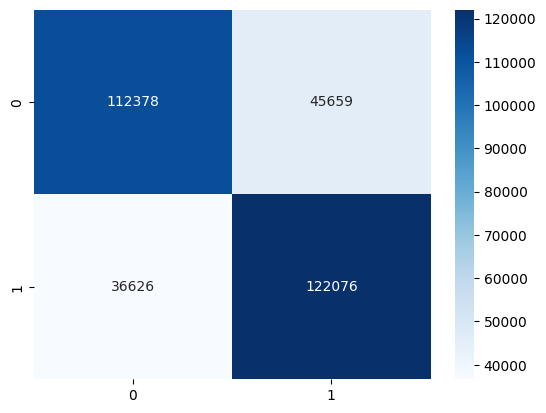

In [ ]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
annot=True,fmt='5',cmap='Blues',xticklabels=[0,1],
yticklabels=[0,1])

In [ ]:
# LSTM model 2nd training
def LSTM_Model_(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words,output_dim=dim,input_length=len))
  model.add(LSTM(units=units,dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
  model.add(LSTM(units=units,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(num_labels,activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
batch_size2 = 8
max_words2 = 25000
max_len2 = 50
embedding_dim2 = 30
lstm_units = 32
num_labels = 2

In [ ]:
model_ = LSTM_Model_(max_words2,max_len2,embedding_dim2,lstm_units,num_labels)

In [ ]:
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 30)            750000    
                                                                 
 lstm (LSTM)                 (None, 50, 32)            8064      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 766,450
Trainable params: 766,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# For the first seq_matrix_1
model_.fit(seq_matrix_dict['seq_matrix_1'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
20000/20000 [==============================] - 1028s 51ms/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6957 - val_accuracy: 0.4968
Epoch 2/3
20000/20000 [==============================] - 1020s 51ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6948 - val_accuracy: 0.4991
Epoch 3/3
20000/20000 [==============================] - 1040s 52ms/step - loss: 0.6782 - accuracy: 0.5677 - val_loss: 0.7084 - val_accuracy: 0.4986


In [ ]:
# Saving the 1st model
model_path = '/content/drive/MyDrive/nlp_data/model_1.h5'
model_.save(model_path)
print("Model saved to", model_path)

Model saved to /content/drive/MyDrive/nlp_data/model_1.h5


In [ ]:
# Load the saved model
from tensorflow import keras
loaded_model = keras.models.load_model(model_path)

NameError: ignored

In [ ]:
loaded_model.fit(seq_matrix_dict['seq_matrix_2'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
20000/20000 [==============================] - 1037s 52ms/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/3
20000/20000 [==============================] - 1030s 51ms/step - loss: 0.6929 - accuracy: 0.5091 - val_loss: 0.6937 - val_accuracy: 0.5013
Epoch 3/3
20000/20000 [==============================] - 1032s 52ms/step - loss: 0.6808 - accuracy: 0.5588 - val_loss: 0.7044 - val_accuracy: 0.5022


In [ ]:
# Saving the 2nd model
model_path_2 = '/content/drive/MyDrive/nlp_data/model_2.h5'
loaded_model.save(model_path_2)
print("Model saved to", model_path_2)

Model saved to /content/drive/MyDrive/nlp_data/model_2.h5


In [ ]:
model_2 = keras.models.load_model(model_path_2)

In [ ]:
model_2.fit(seq_matrix_dict['seq_matrix_3'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
20000/20000 [==============================] - 1048s 52ms/step - loss: 0.6936 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 2/3
20000/20000 [==============================] - 1039s 52ms/step - loss: 0.6910 - accuracy: 0.5238 - val_loss: 0.6958 - val_accuracy: 0.5015
Epoch 3/3
20000/20000 [==============================] - 1030s 52ms/step - loss: 0.6738 - accuracy: 0.5706 - val_loss: 0.7096 - val_accuracy: 0.5024


In [ ]:
# Saving the 3rd model
# model_path_3 = '/content/drive/MyDrive/nlp_data/model_3.h5'
# model_2.save(model_path_3)
# print("Model saved to", model_path_3)

In [ ]:
model_3 = keras.models.load_model(model_path_3)

In [ ]:
model_3.fit(seq_matrix_dict['seq_matrix_4'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
20000/20000 [==============================] - 1046s 52ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5016
Epoch 2/3
20000/20000 [==============================] - 1040s 52ms/step - loss: 0.6888 - accuracy: 0.5338 - val_loss: 0.6989 - val_accuracy: 0.5004
Epoch 3/3
20000/20000 [==============================] - 1040s 52ms/step - loss: 0.6713 - accuracy: 0.5779 - val_loss: 0.7104 - val_accuracy: 0.5027


In [ ]:
# model_path_4 = '/content/drive/MyDrive/nlp_data/model_4.h5'
# model_3.save(model_path_4)
# print("Model saved to", model_path_4)

In [ ]:
model_4 = keras.models.load_model('/content/drive/MyDrive/nlp_data/model_4.h5')

In [ ]:
model_4.fit(seq_matrix_dict['seq_matrix_5'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
20000/20000 [==============================] - 1903s 95ms/step - loss: 0.6940 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 2/3
20000/20000 [==============================] - 1879s 94ms/step - loss: 0.6912 - accuracy: 0.5238 - val_loss: 0.6948 - val_accuracy: 0.5047
Epoch 3/3
20000/20000 [==============================] - 1880s 94ms/step - loss: 0.6807 - accuracy: 0.5582 - val_loss: 0.7031 - val_accuracy: 0.5028


In [ ]:
model_path_5 = '/content/drive/MyDrive/nlp_data/model_5.h5'
model_4.save(model_path_5)
print("Model saved to", model_path_5)

Model saved to /content/drive/MyDrive/nlp_data/model_5.h5


In [ ]:
model_5 = keras.models.load_model('/content/drive/MyDrive/nlp_data/model_5.h5')

In [ ]:
model_5.fit(seq_matrix_dict['seq_matrix_6'],y_train,epochs=3,batch_size=batch_size2,validation_split=0.2,verbose=True)

Epoch 1/3
6696/6696 [==============================] - 899s 132ms/step - loss: 0.6951 - accuracy: 0.5002 - val_loss: 0.6934 - val_accuracy: 0.4944
Epoch 2/3
6696/6696 [==============================] - 885s 132ms/step - loss: 0.6890 - accuracy: 0.5354 - val_loss: 0.6977 - val_accuracy: 0.5031
Epoch 3/3
6696/6696 [==============================] - 883s 132ms/step - loss: 0.6716 - accuracy: 0.5770 - val_loss: 0.7118 - val_accuracy: 0.4985


In [ ]:
prediction = model_5.predict(test_seq_matrix)

9899/9899 [==============================] - 215s 21ms/step


In [ ]:
prediction.shape

(316739, 2)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1)))

              precision    recall  f1-score   support

         0.0       0.50      0.43      0.46    158037
         1.0       0.50      0.57      0.53    158702

    accuracy                           0.50    316739
   macro avg       0.50      0.50      0.50    316739
weighted avg       0.50      0.50      0.50    316739



<Axes: >

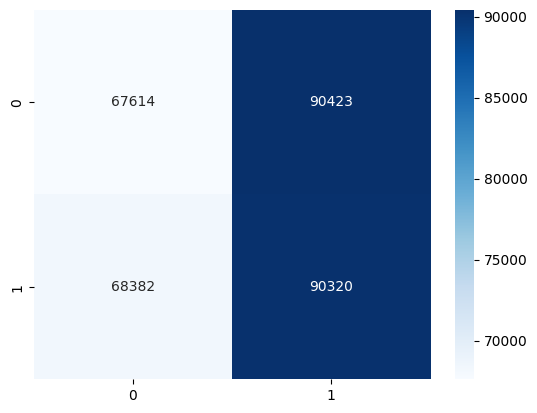

In [ ]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
annot=True,fmt='5',cmap='Blues',xticklabels=[0,1],
yticklabels=[0,1])